In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [59]:
df = pd.read_excel(r"AI_3.xlsx")
df.rename(columns = {"Enter your Department":"Department", "Do you think AI already made an impact in your sector?":"Present_AI", "Do you think AI will have a major impact in your sector in the near future?":"Future_AI", "15 years from now, do you think AI will have a major impact on your job opportunities?":"Future_Job"}, inplace = True)

In [60]:
sample = df.copy()

In [61]:
sample.drop('Present_AI', axis = 'columns', inplace = True)
sample.drop('Future_AI', axis = 'columns', inplace = True)
sample.drop('Future_Job', axis = 'columns', inplace = True)

In [62]:
sample

,Department,CatP,CatF,CatJ
0,Technical,2,2,2
1,Data Science,2,1,1
2,Science,2,1,1
3,Technical,2,2,2
4,Data Science,2,2,2
...,...,...,...,...
158,Data Science,2,2,1
159,Data Science,2,2,-2
160,Technical,2,2,1
161,Technical,2,0,1


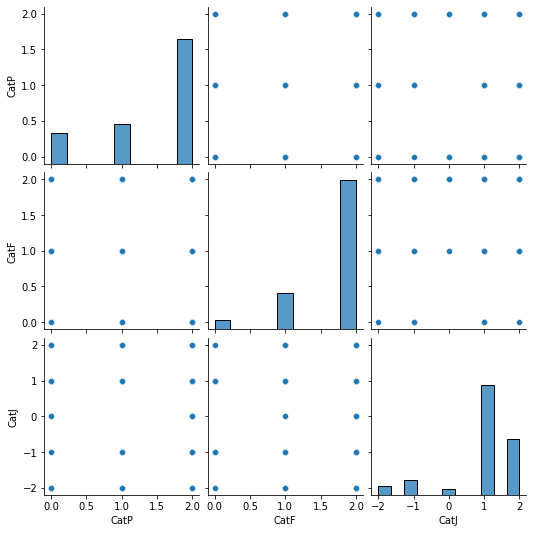

In [63]:
sns.pairplot(sample)

In [64]:
x = sample[["CatP", "CatF"]]
y = df["CatJ"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

In [69]:
model.fit(x_train, y_train)

LinearRegression()

In [70]:
print(model.coef_)

[0.03728213 0.57651201]


In [71]:
print(model.intercept_)

-0.12063626829146468


In [72]:
pd.DataFrame(model.coef_, x.columns, columns = ['coeff'])

,coeff
CatP,0.037282
CatF,0.576512


In [73]:
predictions = model.predict(x_test)

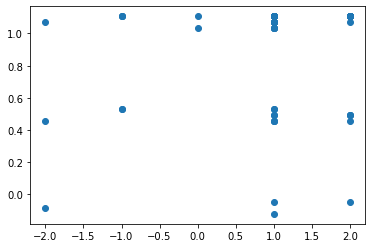

In [74]:
plt.scatter(y_test, predictions)

(array([ 1.,  4.,  1.,  4.,  0., 38.,  4., 23.,  5.,  2.]),
 array([-3.06966988e+00, -2.55809569e+00, -2.04652150e+00, -1.53494731e+00,
        -1.02337312e+00, -5.11798931e-01, -2.24741547e-04,  5.11349448e-01,
         1.02292364e+00,  1.53449783e+00,  2.04607202e+00]),
 <BarContainer object of 10 artists>)

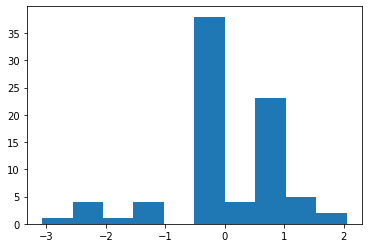

In [75]:
plt.hist(y_test - predictions)

In [76]:
mlr_df = pd.DataFrame({"Present": x_test["CatP"], "Future": x_test["CatF"], "Actual value": y_test, "Predictions": predictions, "Difference": y_test - predictions})

In [77]:
mlr_df

,Present,Future,Actual value,Predictions,Difference
123,1,1,2,0.493158,1.506842
96,2,2,1,1.106952,-0.106952
161,2,0,1,-0.046072,1.046072
160,2,2,1,1.106952,-0.106952
121,2,2,1,1.106952,-0.106952
...,...,...,...,...,...
62,2,2,2,1.106952,0.893048
109,2,2,1,1.106952,-0.106952
120,1,1,1,0.493158,0.506842
129,1,1,2,0.493158,1.506842
